## Experiments

In [44]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [45]:
series_reporters = [
    "recovered-hospital",
    "recovered-with-help",
    "recovered-unchecked",
    "fraction-called-in",
    "deaths",
    "number-destroyed-streets-spotted",
    "fraction-destroyed-streets-spotted",
]

single_reporters = [
    'count crossings with [building-status = "collapsed"]',
    'count crossings with [building-status = "high-damage"]',
    "number-destroyed-streets",
]

In [46]:
replications = 25
exp_nr = 6
exp_names = ["no-drones", "short-range", "slow-reroute", "more-drones", "large-view", "fast-reroute", "many-long-range"]
exp_names = [f"{i}_{name}" for i, name in enumerate(exp_names)]
print(exp_names)

['0_no-drones', '1_short-range', '2_slow-reroute', '3_more-drones', '4_large-view', '5_fast-reroute', '6_many-long-range']


In [47]:
# Read all the pickles into a dictionary of dataframes
dfs = {}
for name in exp_names:
    dfs[name] = pd.read_pickle(f"../results/experiments/exp_series_{name}_{replications}r_df.pickle")

In [48]:
KPIs = series_reporters[:3]

df720 = {}
for KPI in KPIs:
    df720[KPI] = pd.DataFrame()
    for name, df in dfs.items():
        df720[KPI][name] = df.iloc[720][KPI]
df720["recovered-hospital"].head(3)

,0_no-drones,1_short-range,2_slow-reroute,3_more-drones,4_large-view,5_fast-reroute,6_many-long-range
0,667.0,594.0,618.0,571.0,612.0,671.0,612.0
1,461.0,622.0,644.0,549.0,625.0,482.0,568.0
2,532.0,587.0,445.0,690.0,524.0,581.0,458.0


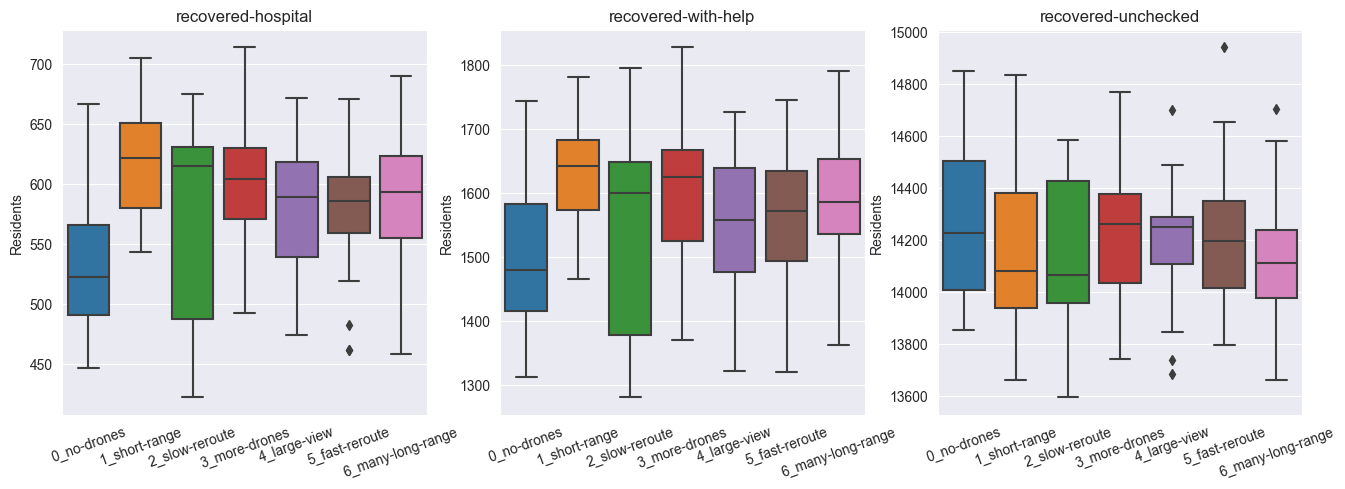

In [49]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(16,5)
g = {}
for i, KPI in enumerate(KPIs):
    g[KPI] = sns.boxplot(df720[KPI], ax=axes[i])
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=20)
    g[KPI].set_title(KPI)
    g[KPI].set_ylabel("Residents")
fig.savefig("../images/recovered_boxplots.svg")